In [249]:
################################################################################
# Author 1:             Naseer Haider
# Author 2:             Wahid Ahmed
# Author 3:             Muhammad Danish Kizahakke 
# Author 4:              Muhammad Usama Rahim_
# File:                 FCSS_Project.ipynb
##################################################################################


<h1>Part 1: Downloading the Required Datasets</h1>

#### - This part involves importing necessary packages and downloading the required datasets.
#### - We use `kagglehub` to download the Book-Crossing dataset from Kaggle.

In [252]:
# Importing packages
import kagglehub
import pandas as pd

# Function to download datasets
def download_datasets():
    print("Downloading Book-Crossing dataset...")
    # Downloading Book-Crossing dataset from Kaggle
    book_crossing_path = kagglehub.dataset_download("somnambwl/bookcrossing-dataset")
    print("Path to Book-Crossing dataset files:", book_crossing_path)

    print("Datasets downloaded successfully.")

# Download the datasets
download_datasets()



Path to Book-Crossing dataset files: C:\Users\User\.cache\kagglehub\datasets\somnambwl\bookcrossing-dataset\versions\1
Datasets downloaded successfully.


# Part 2: Filtering the Datasets

#### - This part filters the Book-Crossing dataset to keep only books rated by at least 50 users.
#### - It also filters users who have rated at least 50 books.
#### - The goal is to have a more focused dataset with sufficient data for analysis.


In [255]:
# Define file paths for the Book-Crossing datasets
books_file_path = "Books.csv"  
ratings_file_path = "Ratings.csv"
users_file_path = "Users.csv"  

# Load the datasets
print("Loading Book-Crossing datasets...")
books = pd.read_csv(books_file_path, sep=';', encoding='latin-1', on_bad_lines='skip')
ratings = pd.read_csv(ratings_file_path, sep=';', encoding='latin-1', on_bad_lines='skip')
users = pd.read_csv(users_file_path, sep=';', encoding='latin-1', on_bad_lines='skip')

# Preview of data basic data & columns
print(books.head())
print(books.columns)
print(ratings.head())
print(ratings.columns)
print(users.head())
print(users.columns)

# Merge Ratings with Books
print("Merging Ratings and Books datasets...")
merged_data = pd.merge(ratings, books, on="ISBN", how="inner")

# Filter books with at least 50 ratings
print("Filtering books with at least 50 ratings...")
# Count the number of ratings for each book (ISBN)
book_counts = merged_data['ISBN'].value_counts()
# Keep books that have been rated at least 50 times
filtered_books = book_counts[book_counts >= 50].index
filtered_data = merged_data[merged_data['ISBN'].isin(filtered_books)]

# Filter users who have rated at least 50 books
print("Filtering users who have rated at least 50 books...")
# Count the number of books rated by each user (User-ID)
user_counts = filtered_data['User-ID'].value_counts()
# Keep users who have rated at least 50 books
filtered_users = user_counts[user_counts >= 50].index
filtered_data = filtered_data[filtered_data['User-ID'].isin(filtered_users)]

# Save the filtered dataset
output_path = "filtered_book_crossing.csv"
filtered_data.to_csv(output_path, index=False)
print(f"Filtered Book-Crossing dataset saved to {output_path}")


Loading Book-Crossing datasets...


C:\Users\User\AppData\Local\Temp\ipykernel_26376\4227661504.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv(users_file_path, sep=';', encoding='latin-1', on_bad_lines='skip')


         ISBN                                              Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

                 Author  Year                Publisher  
0    Mark P. O. Morford  2002  Oxford University Press  
1  Richard Bruce Wright  2001    HarperFlamingo Canada  
2          Carlo D'Este  1991          HarperPerennial  
3      Gina Bari Kolata  1999     Farrar Straus Giroux  
4       E. J. W. Barber  1999   W. W. Norton & Company  
Index(['ISBN', 'Title', 'Author', 'Year', 'Publisher'], dtype='object')
   User-ID        ISBN  Rating
0   276725  034545104X       0
1   276726  0155061224       5
2   276727  0446520802       0
3   276729  052165615X       3
4   276729  0521795028

# Part 3: Verify and Inspect the Filtered Datasets

#### - This part verifies the structure of the filtered dataset.
#### - It ensures the filtering process was successful by displaying the dataset info and a few sample rows.


In [258]:
# File paths for the filtered datasets
book_crossing_path = "filtered_book_crossing.csv"  # Replace with actual path

# Load the filtered datasets
print("Loading filtered datasets...")
filtered_book_crossing = pd.read_csv(book_crossing_path)

# Display dataset info and sample rows
print("\nFiltered Book-Crossing Dataset Info:")
print(filtered_book_crossing.info())
print("Sample Rows:")
print(filtered_book_crossing.head())



Loading filtered datasets...

Filtered Book-Crossing Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95690 entries, 0 to 95689
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   User-ID    95690 non-null  int64 
 1   ISBN       95690 non-null  object
 2   Rating     95690 non-null  int64 
 3   Title      95690 non-null  object
 4   Author     95690 non-null  object
 5   Year       95690 non-null  int64 
 6   Publisher  95690 non-null  object
dtypes: int64(3), object(4)
memory usage: 5.1+ MB
None
Sample Rows:
   User-ID        ISBN  Rating  \
0   277427  002542730X      10   
1   277427  006092988X       0   
2   277427  0060930535       0   
3   277427  0060932139       0   
4   277427  0060934417       0   

                                               Title              Author  \
0  Politically Correct Bedtime Stories: Modern Ta...   James Finn Garner   
1                           A Tree Grows in Brook

# Part 4: Download Dataset for Gender Analysis


#### - This part involves downloading the Gender-to-Name dataset.
#### - This dataset will help map author names to genders for gender analysis.


In [261]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gracehephzibahm/gender-by-name")

print("Path to dataset files:", path)

# Load the dataset to define gender_data
Gender_to_Name_Path = "data.csv"  
gender_data = pd.read_csv(Gender_to_Name_Path)

# Verify the structure again
gender_data.head(), gender_data.columns


Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\gracehephzibahm\gender-by-name\versions\1


(      Name Gender    Count  Probability
 0    James      M  5304407     0.014517
 1     John      M  5260831     0.014398
 2   Robert      M  4970386     0.013603
 3  Michael      M  4579950     0.012534
 4  William      M  4226608     0.011567,
 Index(['Name', 'Gender', 'Count', 'Probability'], dtype='object'))


# Part 5: Gender Analysis

#### - This part performs gender analysis on the Book-Crossing dataset.
#### - The goal is to map the authors' first names to genders using the Gender-to-Name dataset.
#### - We also calculate and display the gender distribution of authors in the Book-Crossing dataset.


In [264]:

# Create a gender dictionary from the gender_data dataset
gender_dict = {name.lower(): gender for name, gender in zip(gender_data['Name'], gender_data['Gender'])}

# Function to map genders to authors
def map_gender(authors_list, gender_dict):
    """
    Map the gender of authors based on the Gender-to-Name dataset.
    """
    genders = []
    for author in authors_list:
        # Ensure the author is a valid string and handle NaN values
        if isinstance(author, str):
            # Get the first name from author (handling both single and multiple authors)
            first_name = author.split()[0].strip("['\"]").lower()
            gender = gender_dict.get(first_name, 'Unknown')  # Default to 'Unknown' if name not found
        else:
            gender = 'Unknown'  # If the value is not a string, assign 'Unknown'
        genders.append(gender)
    return genders

# Map genders to authors in the Book-Crossing dataset
filtered_book_crossing['gender'] = map_gender(filtered_book_crossing['Author'], gender_dict)

# Gender distribution analysis for Book-Crossing dataset
book_crossing_gender_distribution = filtered_book_crossing['gender'].value_counts()
book_crossing_total = book_crossing_gender_distribution.sum()
book_crossing_gender_percentages = (book_crossing_gender_distribution / book_crossing_total * 100).round(2)

print("\nBook-Crossing Dataset Gender Distribution:")
print(book_crossing_gender_distribution)
print("\nBook-Crossing Dataset Gender Percentages:")
print(book_crossing_gender_percentages)



Book-Crossing Dataset Gender Distribution:
gender
M          48077
F          44802
Unknown     2811
Name: count, dtype: int64

Book-Crossing Dataset Gender Percentages:
gender
M          50.24
F          46.82
Unknown     2.94
Name: count, dtype: float64


# Part 6: Debiasing the Datasets

#### - This part adjusts the ratings to debias them based on gender.
#### - Gender-based biases in user ratings are removed by normalizing ratings based on the gender average.


In [267]:

# Debiasing function
def debias_ratings(df, rating_col, gender_col):
    """
    Adjust ratings to debias based on gender.
    - Removes gender-based biases in user ratings.
    """
    # Calculate average ratings for each gender
    gender_avg_ratings = df.groupby(gender_col)[rating_col].mean()

    # Normalize ratings for each user based on their gender
    def adjust_rating(row):
        if row[gender_col] == 'M':
            return row[rating_col] - gender_avg_ratings['M']
        elif row[gender_col] == 'F':
            return row[rating_col] - gender_avg_ratings['F']
        else:
            return row[rating_col]  # For Unknown gender, leave the rating unchanged

    df[rating_col + '_debias'] = df.apply(adjust_rating, axis=1)
    return df

# Apply debiasing to the Book-Crossing dataset
book_crossing_debiased = debias_ratings(filtered_book_crossing, 'Rating', 'gender')

# Display debiased data for Book-Crossing
print(book_crossing_debiased[['Title', 'Rating', 'gender', 'Rating_debias']].head())

# Step 4: For Book-Crossing, continue debiasing as usual
book_crossing_debiased = debias_ratings(book_crossing_debiased, 'Rating', 'gender')

# Step 5: Display debiased data for Book-Crossing
print(book_crossing_debiased[['Title', 'Rating', 'gender', 'Rating_debias']].head())


                                               Title  Rating gender  \
0  Politically Correct Bedtime Stories: Modern Ta...      10      F   
1                           A Tree Grows in Brooklyn       0      M   
2                      The Poisonwood Bible: A Novel       0      M   
3  The Unbearable Lightness of Being : A Novel (P...       0      F   
4                                 Bel Canto: A Novel       0      M   

   Rating_debias  
0        8.06118  
1       -1.98153  
2       -1.98153  
3       -1.93882  
4       -1.98153  
                                               Title  Rating gender  \
0  Politically Correct Bedtime Stories: Modern Ta...      10      F   
1                           A Tree Grows in Brooklyn       0      M   
2                      The Poisonwood Bible: A Novel       0      M   
3  The Unbearable Lightness of Being : A Novel (P...       0      F   
4                                 Bel Canto: A Novel       0      M   

   Rating_debias  
0        8.06

# Log-Bias Adjustment for Ratings and Visualization

#### In this section, we first define a function to apply a log-bias transformation to the ratings data. 
#### The log transformation helps in reducing the impact of extreme ratings and normalizes the data.
#### Then, we apply this log-bias adjustment to both the Amazon and Book-Crossing datasets.
#### Finally, we visualize the distribution of the ratings before and after the debiasing process using histograms.

C:\Users\User\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


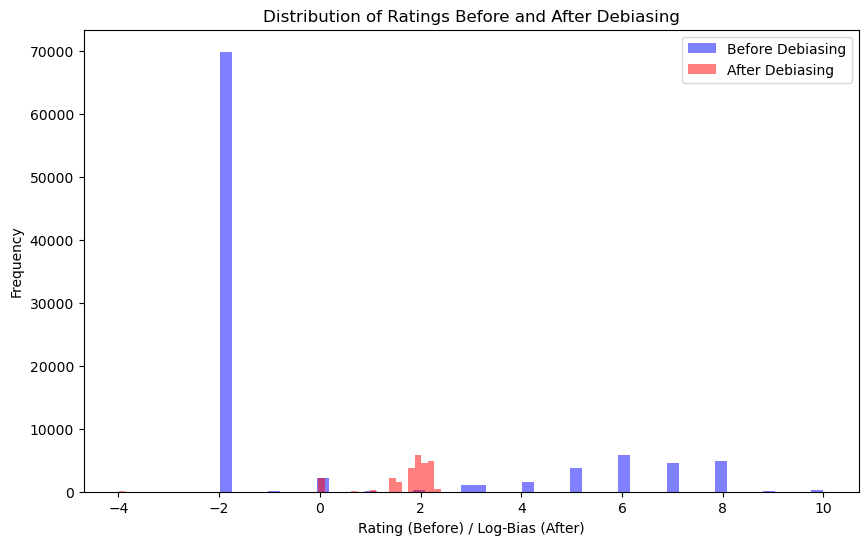

In [270]:
import numpy as np
import matplotlib.pyplot as plt

def log_bias_adjustment(df, rating_col):
    df['log_bias'] = np.log(1 + df[rating_col])
    return df

# Apply log-bias transformation
book_crossing_debiased = log_bias_adjustment(book_crossing_debiased, 'Rating_debias')

# Visualize the distribution before and after debiasing
plt.figure(figsize=(10,6))

# Plot before debiasing (assuming original ratings are in 'Rating_debias' column)
plt.hist(book_crossing_debiased['Rating_debias'], bins=50, alpha=0.5, label='Before Debiasing', color='b')

# Plot after debiasing (log-transformed ratings)
plt.hist(book_crossing_debiased['log_bias'], bins=50, alpha=0.5, label='After Debiasing', color='r')

plt.legend(loc='upper right')
plt.title("Distribution of Ratings Before and After Debiasing")
plt.xlabel("Rating (Before) / Log-Bias (After)")
plt.ylabel("Frequency")
plt.show()


# Installing and Importing Libraries for Collaborative Filtering

#### In this section, we install and import the scikit-surprise library, which provides a suite of tools for building collaborative filtering recommendation systems.
#### We import models like SVD, NMF, and KNNBasic, as well as the necessary functions for dataset handling and performance evaluation (like RMSE).

In [273]:
# Install scikit-surprise
!pip install scikit-surprise

from surprise import SVD, NMF, KNNBasic
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Preparing the Dataset for Surprise Library

#### Here, we prepare the data for the Surprise library by defining the rating scale (0-10) and converting the dataset into a format that Surprise understands.
#### We split the dataset into training and testing sets, using an 80%-20% split to ensure that we can evaluate the model on unseen data.

In [276]:
# Prepare the dataset for Surprise
reader = Reader(rating_scale=(0, 10))  # Ratings are from 0 to 10
data = Dataset.load_from_df(filtered_book_crossing[['User-ID', 'ISBN', 'Rating']], reader)

# Split data into training and testing sets (80%-20%)
trainset, testset = train_test_split(data, test_size=0.2)


# Training KNN Models for Collaborative Filtering

#### This section involves training two types of K-Nearest Neighbors (KNN) models: User-based KNN and Item-based KNN.
##### - User-based KNN recommends items based on similar users’ preferences.
##### - Item-based KNN recommends items based on similarity between items.
#### Both models are trained on the training set and then evaluated using the RMSE metric.


In [279]:
# 1. KNN Algorithms
# User-based collaborative filtering using KNN
print("\nTraining UserKNN...")
user_knn = KNNBasic(sim_options={'user_based': True})
user_knn.fit(trainset)
user_knn_preds = user_knn.test(testset)
user_knn_rmse = accuracy.rmse(user_knn_preds)

# Item-based collaborative filtering using KNN
print("\nTraining ItemKNN...")
item_knn = KNNBasic(sim_options={'user_based': False})
item_knn.fit(trainset)
item_knn_preds = item_knn.test(testset)
item_knn_rmse = accuracy.rmse(item_knn_preds)



Training UserKNN...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.5311

Training ItemKNN...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 3.2992


# Training Matrix Factorization Models (SVD and NMF)

#### In this section, we train two matrix factorization models: SVD (Singular Value Decomposition) and NMF (Non-negative Matrix Factorization).
#### SVD is a popular method in collaborative filtering, using latent factors to model the user-item interaction.
#### NMF is an alternative factorization technique that requires all data to be non-negative, making it useful in some recommendation tasks.
#### Both models are trained on the training set, evaluated on the test set, and their performance is measured using RMSE.

In [282]:
# 2. Matrix Factorization Algorithms
# Singular Value Decomposition (SVD)
print("\nTraining SVD...")
svd = SVD()
svd.fit(trainset)
svd_preds = svd.test(testset)
svd_rmse = accuracy.rmse(svd_preds)

# Alternating Least Squares (ALS) Using NMF as an Alternative
print("\nTraining NMF (for ALS alternative)...")
nmf = NMF()
nmf.fit(trainset)
nmf_preds = nmf.test(testset)
nmf_rmse = accuracy.rmse(nmf_preds)



Training SVD...
RMSE: 3.3950

Training NMF (for ALS alternative)...
RMSE: 3.6825


# Evaluating the Models Using RMSE

#### The performance of each model is evaluated using the Root Mean Squared Error (RMSE), which provides a measure of how well the model's predictions match the actual ratings.
#### A lower RMSE indicates a better performing model, so we compare the results from the KNN-based models and matrix factorization models.

In [285]:
# Print RMSE values for evaluation
print("\nRMSE Results:")
print(f"UserKNN RMSE: {user_knn_rmse}")
print(f"ItemKNN RMSE: {item_knn_rmse}")
print(f"SVD RMSE: {svd_rmse}")
print(f"NMF RMSE: {nmf_rmse}")



RMSE Results:
UserKNN RMSE: 3.531133247368096
ItemKNN RMSE: 3.2991966375199535
SVD RMSE: 3.395048218105989
NMF RMSE: 3.6825304298247006


# Calculating Log-Bias for Users

#### The function calculate_log_bias calculates a log-bias for each user, where the log-bias is computed as the mean of the logarithm of non-zero ratings for each user.
#### Grouping by User-ID: The ratings are grouped by User-ID so that we can calculate the log-bias for each user.
#### Handling Zero Ratings: It skips zero ratings during the log-bias calculation to ensure they don’t skew the result. If all ratings for a user are zero, a bias of 0 is assigned to that user.
#### Log Calculation: It calculates the natural logarithm (np.log) of the non-zero ratings for each user, and the average of these values is returned as the user's log-bias.

In [288]:
import numpy as np

def calculate_log_bias(filtered_data):
    """
    Calculate the log-bias (θ_u) for each user, skipping zero ratings.
    """
    log_biases = {}
    
    # Group data by User-ID and calculate log-bias for each user
    for user_id, group in filtered_data.groupby('User-ID'):
        ratings = group['Rating'].values
        
        # Only include non-zero ratings in the log-bias calculation
        non_zero_ratings = ratings[ratings > 0]
        
        # If the user has rated at least one non-zero item, calculate the log-bias
        if len(non_zero_ratings) > 0:
            log_bias = np.mean(np.log(non_zero_ratings))  # Calculate log of non-zero ratings
        else:
            log_bias = 0  # If all ratings are zero, set bias to 0 (or handle as you see fit)
        
        log_biases[user_id] = log_bias
    
    return log_biases

# Calculate log-biases for each user, skipping zero ratings
log_biases = calculate_log_bias(filtered_book_crossing)


# Debiasing the Ratings Using Log-Bias

#### The function calculate_debiased_ratings adjusts the ratings by subtracting each user's log-bias from their ratings. The goal is to eliminate biases in the ratings data that may have been introduced by individual users.
#### Log-Bias Adjustment: The function loops through each row in the dataset and retrieves the corresponding user’s log-bias. If the log-bias for a user is not available, it defaults to 0.
#### Debiased Rating: The debiased rating is calculated by subtracting the log-bias from the original rating, effectively removing any user-specific bias.
#### Returning the Adjusted Data: The debiased ratings are added to the dataset as a new column (Debiased_Rating).

In [291]:
def calculate_debiased_ratings(filtered_data, log_biases):
    """
    Adjust the ratings using the log-bias to create debiased ratings.
    """
    debiased_ratings = []
    
    # Loop over each row to calculate the debiased rating
    for _, row in filtered_data.iterrows():
        user_id = row['User-ID']
        rating = row['Rating']
        
        # Get the log-bias for the user
        log_bias = log_biases.get(user_id, 0)  # Default to 0 if no log-bias exists
        
        # Calculate the debiased rating
        debiased_rating = rating - log_bias
        debiased_ratings.append(debiased_rating)
    
    # Add the debiased ratings as a new column
    filtered_data['Debiased_Rating'] = debiased_ratings
    return filtered_data

# Apply debiasing to the filtered Book-Crossing dataset
filtered_book_crossing = calculate_debiased_ratings(filtered_book_crossing, log_biases)


# Reintroducing User-Specific Preferences: Preference Correction

#### The function apply_preference_correction reintroduces a user-specific preference to the debiased ratings.
#### User-Specific Preference (alpha_u): A fixed value alpha_u is added to each debiased rating, allowing the model to adjust the ratings based on a user-specific parameter.
#### Adjustment Process: The function loops over each row in the dataset, retrieves the debiased rating, and adds the value of alpha_u to it, which represents the user's preference.
#### Returning the Adjusted Data: The adjusted ratings are stored in a new column (Adjusted_Rating), which is then returned as part of the dataset.

In [294]:
def apply_preference_correction(filtered_data, alpha_u=0.5):
    """
    Adjust the debiased ratings by reintroducing the user-specific preference.
    """
    adjusted_ratings = []
    
    for _, row in filtered_data.iterrows():
        debiased_rating = row['Debiased_Rating']
        
        # Apply user-specific preference parameter (alpha_u)
        adjusted_rating = debiased_rating + alpha_u
        adjusted_ratings.append(adjusted_rating)
    
    # Add the adjusted ratings as a new column
    filtered_data['Adjusted_Rating'] = adjusted_ratings
    return filtered_data

# Example: Apply a fixed preference correction for each user
alpha_u = 0.5  # Example value for user-specific preference (this can vary by user)
filtered_book_crossing = apply_preference_correction(filtered_book_crossing, alpha_u)


# Training an SVD Model Using Debiased Ratings

### Dataset Preparation:
#### The Dataset and Reader from the Surprise library are used to prepare the dataset, which consists of user-item ratings that have been adjusted by reintroducing the user-specific preferences.
#### We load the filtered_book_crossing data with the adjusted ratings (Adjusted_Rating) into the Dataset format suitable for collaborative filtering algorithms.
### Data Splitting:
#### The data is split into training and testing sets using train_test_split with an 80%-20% split, ensuring that the model is trained on 80% of the data and tested on the remaining 20%.
### SVD Model Training:
#### The SVD (Singular Value Decomposition) algorithm is used for matrix factorization. The model is trained on the training set (trainset_debiased) and evaluated on the test set (testset_debiased).
### RMSE Evaluation:
#### The Root Mean Squared Error (RMSE) is computed on the predictions made by the trained SVD model to evaluate its performance in terms of how well it predicts ratings.

In [297]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy

# Prepare the dataset for Surprise using the adjusted ratings
reader = Reader(rating_scale=(0, 10))
data_debiased = Dataset.load_from_df(filtered_book_crossing[['User-ID', 'ISBN', 'Adjusted_Rating']], reader)

# Split data into training and testing sets (80%-20%)
trainset_debiased, testset_debiased = train_test_split(data_debiased, test_size=0.2)

# Train an SVD model using the debiased ratings
svd_debiased = SVD()
svd_debiased.fit(trainset_debiased)
svd_debiased_preds = svd_debiased.test(testset_debiased)

# Evaluate RMSE for the debiased model
svd_debiased_rmse = accuracy.rmse(svd_debiased_preds)

print(f"SVD Debiased RMSE: {svd_debiased_rmse}")


RMSE: 3.3792
SVD Debiased RMSE: 3.3791703091257865


# Evaluating SVD Model and Generating Top-N Recommendations

#### This section focuses on two main tasks:
#### Training and evaluating an SVD model: The first part uses the Surprise library to evaluate a Singular Value Decomposition (SVD) model on the biased ratings.
#### Generating Top-N Recommendations: The second part sorts the dataset based on the adjusted ratings (after debiasing) and generates top-N recommendations for each user.


In [300]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD, accuracy

# Prepare the dataset for Surprise using the original ratings (biased)
data_biased = Dataset.load_from_df(filtered_book_crossing[['User-ID', 'ISBN', 'Rating']], reader)

# Split data into training and testing sets (80%-20%)
trainset_biased, testset_biased = train_test_split(data_biased, test_size=0.2)

# Train an SVD model using the biased ratings
svd_biased = SVD()
svd_biased.fit(trainset_biased)
svd_biased_preds = svd_biased.test(testset_biased)

# Evaluate RMSE for the biased model
svd_biased_rmse = accuracy.rmse(svd_biased_preds)

print(f"SVD Biased RMSE: {svd_biased_rmse}")

# List all unique User-IDs in the filtered dataset
available_users = filtered_book_crossing['User-ID'].unique()

# Print the first 10 available User-IDs
print(available_users[:10])

# Step 1: Sort the filtered dataset based on Adjusted_Rating (debized ratings)
filtered_book_crossing_sorted = filtered_book_crossing.sort_values(by='Adjusted_Rating', ascending=False)

# Step 2: Display the top-N recommendations for each user
# You can select the top 10 recommendations for each user, for example:
top_n_recommendations = filtered_book_crossing_sorted.groupby('User-ID').head(10)

# Display the top-N recommendations for the first few users
print(top_n_recommendations[['User-ID', 'ISBN', 'Title', 'Adjusted_Rating']].head(20))  # Top 20 rows for example


RMSE: 3.4106
SVD Biased RMSE: 3.4106161297882456
[277427 278418    243    254    882   2276   2766   3363   4017   5903]
       User-ID        ISBN                                              Title  \
63432   186570  0671789422                       Possessing the Secret of Joy   
61737   180957  1400032717  The Curious Incident of the Dog in the Night-T...   
73219   217318  0671042262                         The Blue Nowhere : A Novel   
73186   217318  0446611611                                      City of Bones   
73180   217318  0446607274    Angels Flight (Detective Harry Bosch Mysteries)   
73152   217318  0312955006          The Concrete Blonde (A Harry Bosch Novel)   
43049   126736  0553295772                                   Extreme Measures   
58534   170861  0385504209                                  The Da Vinci Code   
74731   223087  1400031346                 The No. 1 Ladies' Detective Agency   
46869   135458  0553562738                                      Dooms

# Calculating NDCG for Biased Recommendations

#### The code below calculates the Normalized Discounted Cumulative Gain (NDCG) at k=10 for the recommendations based on the biased model.

In [303]:
from sklearn.metrics import ndcg_score
import numpy as np

def calculate_ndcg_biased(predictions, k=10):
    """
    Calculate the NDCG at k for the recommendations for the biased model.
    """
    # Initialize lists for true relevance and predicted scores
    y_true = []
    y_score = []
    
    # Iterate over each user
    for user_id in predictions['User-ID'].unique():
        user_preds = predictions[predictions['User-ID'] == user_id].head(k)
        
        # Get the relevance (1 if Rating >= 8, else 0)
        relevance = [1 if rating >= 8 else 0 for rating in user_preds['Rating']]
        
        # Get the predicted score (rating itself)
        predicted_scores = user_preds['Rating'].values
        
        # Append the true relevance and predicted scores for this user
        y_true.append(relevance)
        y_score.append(predicted_scores)
    
    # Compute NDCG using sklearn's ndcg_score
    return ndcg_score(y_true, y_score, k=k)

# Calculate NDCG for the biased recommendations (using original ratings)
ndcg_biased = calculate_ndcg_biased(filtered_book_crossing_sorted, k=10)
print(f"NDCG for Biased Model: {ndcg_biased}")


NDCG for Biased Model: 0.9663760896637609


# Calculating NDCG for the Debiased Model:

#### This part of the code calculates the Normalized Discounted Cumulative Gain (NDCG) at k for the recommendations generated using the debiased ratings. NDCG is a metric used to measure the effectiveness of recommendation systems by considering how well the system ranks relevant items (based on the adjusted ratings).
#### - True Relevance: For each user, if the Adjusted_Rating is greater than or equal to 8, the item is considered relevant (with a relevance of 1). Otherwise, it is considered irrelevant (with a relevance of 0).
#### - Predicted Scores: The predicted scores for ranking are the Adjusted_Rating values for each item.
#### The function iterates over each user in the dataset, computes the relevance and predicted score for the top-k items, and then calculates the NDCG score using sklearn's ndcg_score function. The NDCG score gives an indication of how well the system ranks the most relevant items for each user.
#### The final NDCG score is printed for the Debiased Model, which reflects how effectively the system performs in ranking items with higher relevance according to the debiased ratings.

In [306]:
from sklearn.metrics import ndcg_score
import numpy as np

def calculate_ndcg_debiased(predictions, k=10):
    """
    Calculate the NDCG at k for the recommendations for the debiased model.
    """
    y_true = []  # True relevance (1 for relevant, 0 for not relevant)
    y_score = []  # Predicted relevance score (Adjusted_Rating)

    # Iterate over each user in the dataset
    for user_id in predictions['User-ID'].unique():
        user_preds = predictions[predictions['User-ID'] == user_id].head(k)
        
        # Get the relevance (1 if Adjusted_Rating >= 8, else 0)
        relevance = [1 if rating >= 8 else 0 for rating in user_preds['Adjusted_Rating']]
        
        # Get the predicted score (Adjusted_Rating itself)
        predicted_scores = user_preds['Adjusted_Rating'].values
        
        # Append the true relevance and predicted scores for this user
        y_true.append(relevance)
        y_score.append(predicted_scores)
    
    # Compute NDCG using sklearn's ndcg_score function
    return ndcg_score(y_true, y_score, k=k)

# Calculate NDCG for the debiased recommendations (using Adjusted_Rating)
ndcg_debiased = calculate_ndcg_debiased(filtered_book_crossing_sorted, k=10)

# Print the NDCG score for the debiased model
print(f"NDCG for Debiased Model: {ndcg_debiased}")


NDCG for Debiased Model: 0.800747198007472


# Calculating Mean Reciprocal Rank (MRR) for the Biased Model:

#### This part of the code calculates the Mean Reciprocal Rank (MRR) for the recommendations generated using the biased ratings (original ratings). MRR is a metric used to evaluate recommendation systems based on how quickly relevant items appear in the ranked list of recommendations.

#### -  Reciprocal Rank: For each user, the reciprocal rank is computed as the inverse of the position of the first relevant item. If the first relevant item appears at rank r, the reciprocal rank is 1/r.
#### - Relevance Criteria: An item is considered relevant if its Rating is greater than or equal to 8.
#### The function iterates over each user, finds the first relevant item, computes its reciprocal rank, and accumulates the result. If no relevant item is found, the reciprocal rank is considered as 0 for that user.

#### Finally, the Mean Reciprocal Rank (MRR) is calculated by averaging the reciprocal ranks across all users in the dataset. This gives an indication of how well the system ranks relevant items for users on average.

In [309]:
def calculate_mrr_biased(predictions, k=10):
    """
    Calculate Mean Reciprocal Rank (MRR) for the top-k recommendations for the biased model.
    """
    mrr = 0.0
    num_users = predictions['User-ID'].nunique()

    # Iterate over each user in the dataset
    for user_id in predictions['User-ID'].unique():
        user_preds = predictions[predictions['User-ID'] == user_id].head(k)
        
        # Find the first relevant item (Rating >= 8)
        relevant_items = user_preds[user_preds['Rating'] >= 8]
        
        if len(relevant_items) > 0:
            # Reciprocal rank of the first relevant item
            rank = 1 / (user_preds.index.get_loc(relevant_items.index[0]) + 1)
            mrr += rank
        else:
            mrr += 0  # No relevant item found
    
    # Calculate MRR as the mean across all users
    return mrr / num_users

# Calculate MRR for the biased recommendations (using original ratings)
mrr_biased = calculate_mrr_biased(filtered_book_crossing_sorted, k=10)
print(f"MRR for Biased Model: {mrr_biased}")


MRR for Biased Model: 0.9663760896637609


# Calculating Mean Reciprocal Rank (MRR) for the Debiased Model:

#### This section of the code calculates the Mean Reciprocal Rank (MRR) for the top-k recommendations for the debiased model. MRR is an evaluation metric used to assess recommendation systems, based on the rank at which a relevant item is found in the recommendation list.

#### Reciprocal Rank: The reciprocal rank is the inverse of the position of the first relevant item in the recommendation list. For example, if the first relevant item is ranked 1st, the reciprocal rank is 1. If it is ranked 2nd, the reciprocal rank is 1/2, and so on.
#### Relevance Criteria: In this case, an item is considered relevant if its Adjusted_Rating is greater than or equal to 8.
#### The function goes through each user’s recommendations, finds the first relevant item based on the adjusted ratings, calculates its reciprocal rank, and accumulates this value for all users. If no relevant item is found, the reciprocal rank for that user is considered 0.

#### Finally, the Mean Reciprocal Rank (MRR) is calculated as the average of the reciprocal ranks across all users. A higher MRR indicates that relevant items tend to appear higher in the recommendation list.

In [312]:
def calculate_mrr_debiased(predictions, k=10):
    """
    Calculate Mean Reciprocal Rank (MRR) for the top-k recommendations for the debiased model.
    """
    mrr = 0.0
    num_users = predictions['User-ID'].nunique()

    # Iterate over each user in the dataset
    for user_id in predictions['User-ID'].unique():
        user_preds = predictions[predictions['User-ID'] == user_id].head(k)
        
        # Find the first relevant item (Adjusted_Rating >= 8)
        relevant_items = user_preds[user_preds['Adjusted_Rating'] >= 8]
        
        if len(relevant_items) > 0:
            # Reciprocal rank of the first relevant item
            rank = 1 / (user_preds.index.get_loc(relevant_items.index[0]) + 1)
            mrr += rank
        else:
            mrr += 0  # No relevant item found
    
    # Calculate MRR as the mean across all users
    return mrr / num_users

# Calculate MRR for the debiased recommendations (using Adjusted_Rating)
mrr_debiased = calculate_mrr_debiased(filtered_book_crossing_sorted, k=10)
print(f"MRR for Debiased Model: {mrr_debiased}")


MRR for Debiased Model: 0.800747198007472
